### Objective : 

To categorise the countries using socio-economic and health factors that determine the overall development of the countryost.


#### About organization: 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward 
countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and 
effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to 
categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest 
the countries which the CEO needs to focus on the most.

**Solution:**


We'll use the consept of clustering in Unsupervised Learning and woll try to find the group of contries which need the funds most. We
will also create an application for NGO, where they need to enter the details (Socio-economic data) and it will predict what cluster this data belongs to.

Data Desceription

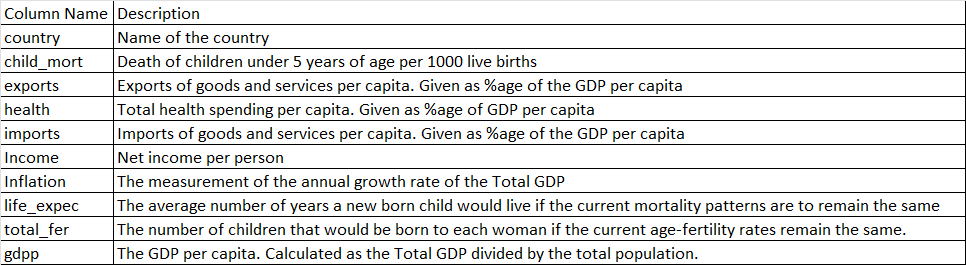pulation.


### Data Description


In [108]:
### Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('Country-data.csv')

In [9]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [10]:
## Lets make country as index
data.set_index('country',inplace=True)

In [11]:
data

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0    5.89     30.9    3280      14.00   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200  
...                         ...        ...    ...  
Vanuatu                    63.0       3.50   2970  
Venezuela                  75.4       2.47  13500  
Vietnam                    73.1       1.95   1310  
Yemen                      67.5       4.67   1310  
Zambia                     52.0       5.40   1460  

[167 rows x 9 columns]

In [12]:
print('No of countries:',data.shape[0])
print('No of columns:',data.shape[1])

No of countries: 167
No of columns: 9


In [13]:
#### Data information
data.info

<bound method DataFrame.info of                      child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia  

In [14]:
## Five point summary
data.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

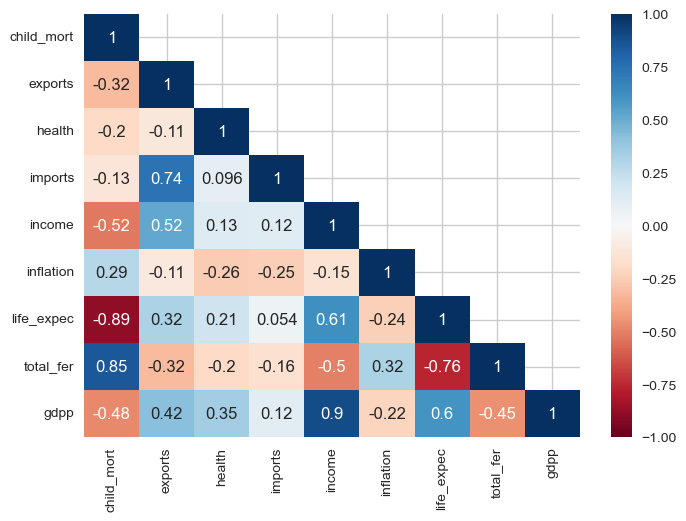

In [15]:
## Lets look as the correlation heatmap to identif any significant relations
sns.heatmap(data.corr(),annot=True,vmin=-1,cmap='RdBu',mask=np.triu(data.corr(),k=1))
plt.show()

#### Inferences : 
* Countries with higher life expentency have significantly lower child mortality.
* People living in countries with higher GDP/population have higher Income.
* Counteries with better Income have lower child mortality rate.


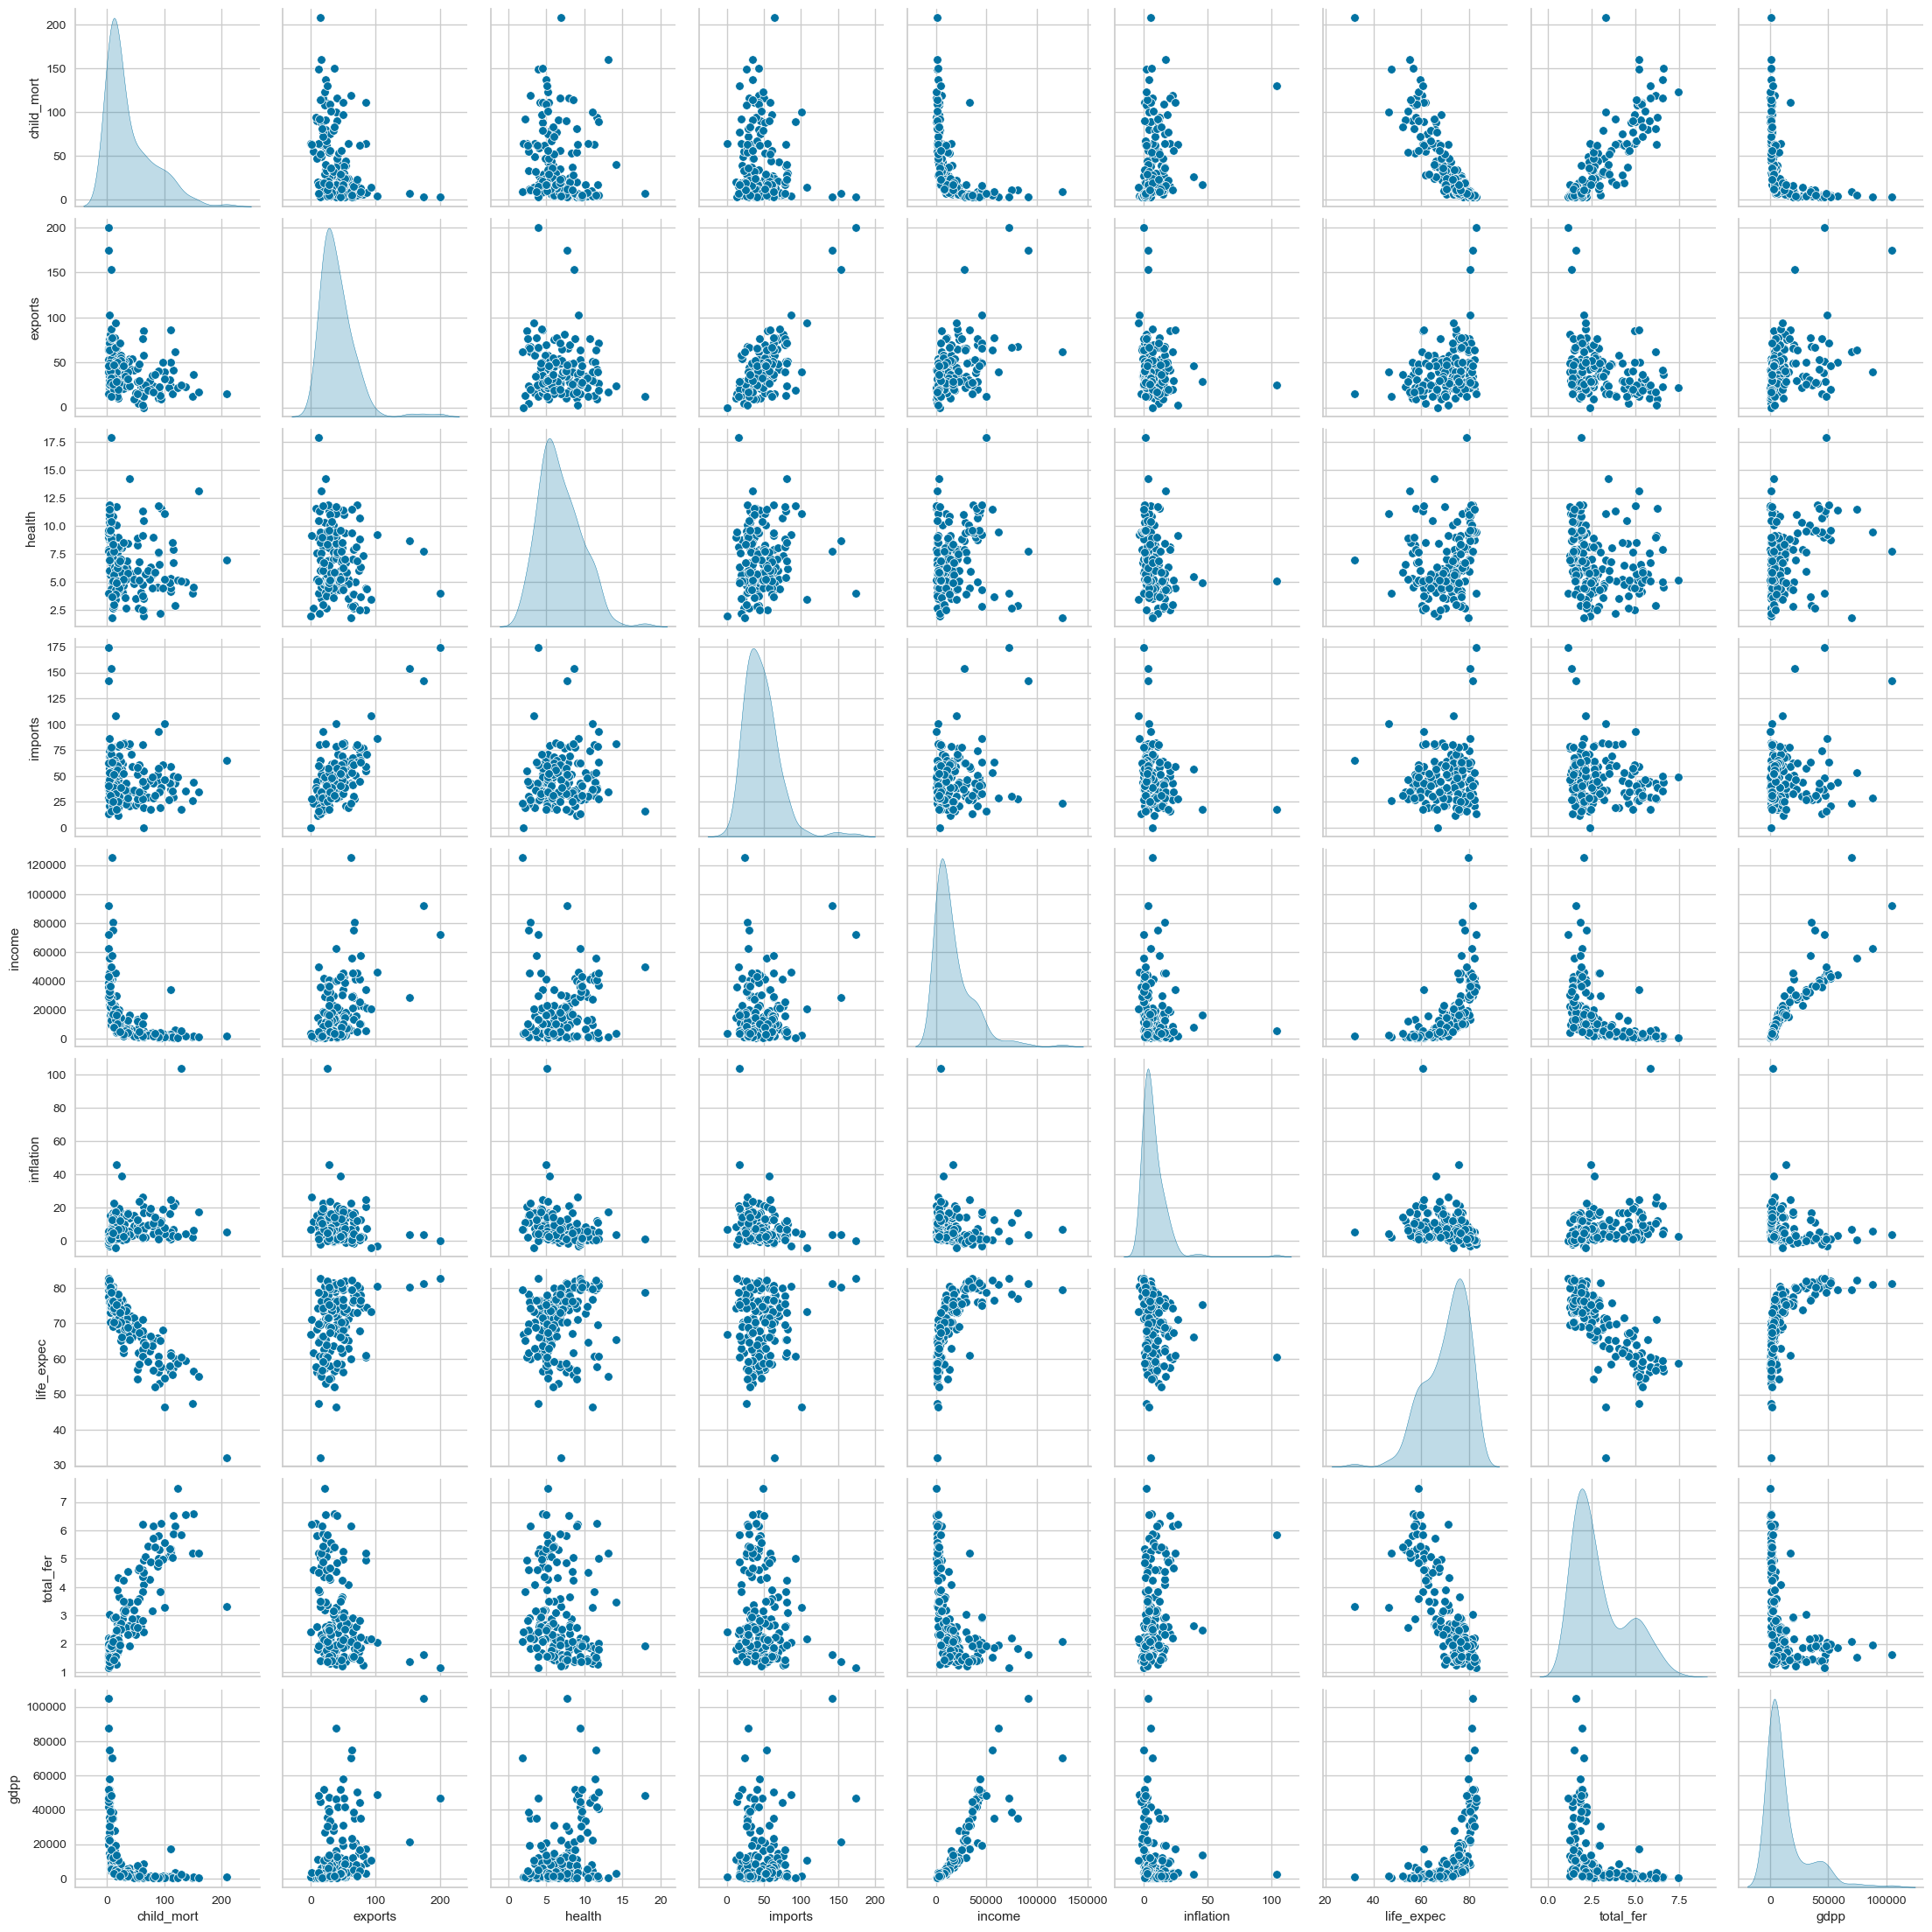

In [17]:
### Visualization
sns.pairplot(data,diag_kind='kde')
plt.show()

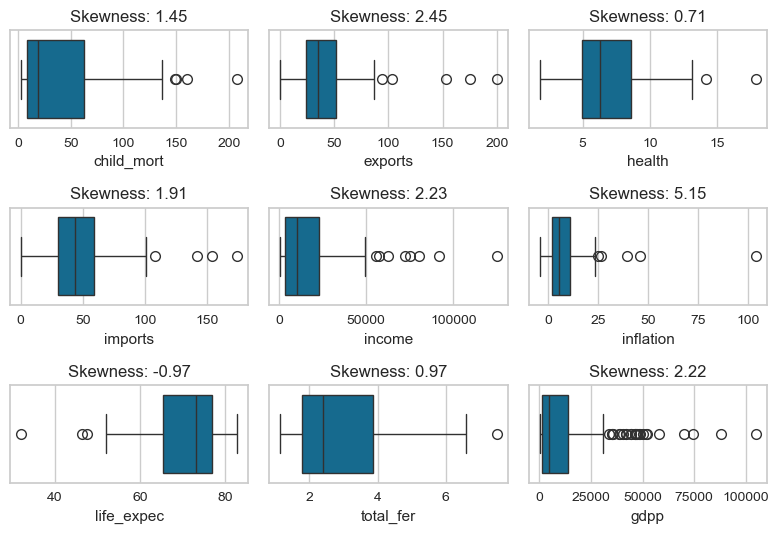

In [18]:
## Explore the skewness and outliers using Boxplot
t=1
for i in data:
    plt.subplot(3,3,t)
    sns.boxplot(data,x=i)
    t+=1
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
plt.tight_layout()
plt.show()

### Preprocessing

In [20]:
## Lets check for missing values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [21]:
# Don't have any missing values

In [22]:
## Check for duplicates
data.duplicated().sum()

0

In [23]:
## Don't have duplicated values

#### Treat the outliers

In [25]:
## Lets cap the outliers
for i in data:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+2*iqr,q1-2*iqr
    data[i]=data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

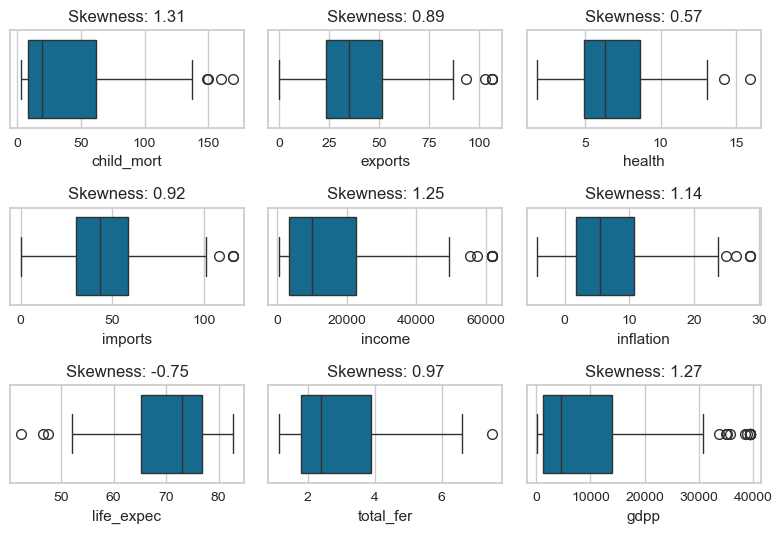

In [26]:
t=1
for i in data:
    plt.subplot(3,3,t)
    sns.boxplot(data,x=i)
    t+=1
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
plt.tight_layout()
plt.show()

### Scale the data

In [28]:
sl=StandardScaler()
data_s=pd.DataFrame(sl.fit_transform(data),columns=data.columns)

In [29]:
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp  
country                                              
Afghanistan                56.2       5.82    553.0  
Albania                    76.3       1.65   4090.0  
Algeria                    76.5       2.89   4460.0  
Angola                     60.1       6.16   3530.0  
Antigua and Barbuda        76.8       2.13  12200.0

## Lets Reduce the data using PCA

In [31]:
pca=PCA(n_components=9)
pca.fit(data_s)

PCA(n_components=9)

In [32]:
## Lets see how many Pc's we can have
pca.explained_variance_

array([4.36078478, 1.50181611, 1.23490898, 0.89728681, 0.59365874,
       0.1966251 , 0.14870828, 0.08513501, 0.03529306])

In [33]:
## As per Kasier Crirerion we can have 3 PC's

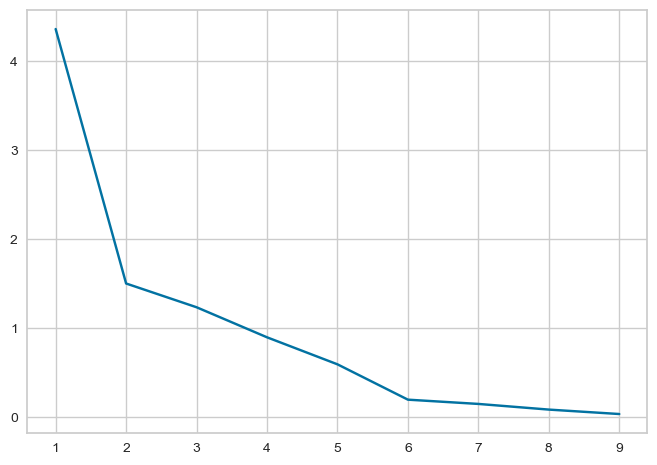

In [34]:
## Lets plot a scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [35]:
## Explained variance ratio
pca.explained_variance_ratio_

array([0.48163025, 0.16586924, 0.13639048, 0.09910154, 0.0655671 ,
       0.02171641, 0.0164242 , 0.0094028 , 0.00389797])

In [36]:
## Let's use pc's which use 95 % variance
pca.explained_variance_ratio_.cumsum()

array([0.48163025, 0.6474995 , 0.78388998, 0.88299152, 0.94855862,
       0.97027503, 0.98669923, 0.99610203, 1.        ])

In [37]:
pca_final=PCA(n_components=5)
pca_data=pd.DataFrame(pca_final.fit_transform(data_s),columns=range(1,6))

In [38]:
pca_data.head()

1         2         3         4         5
0 -3.099217 -0.232689 -0.972447  0.787536 -0.009905
1  0.427427 -0.285346 -0.242571 -1.377388  0.114011
2 -0.411658 -0.526613  1.634043 -0.613283  0.459962
3 -3.217072  1.229145  1.983955  1.635771  0.159702
4  1.189011  0.479460 -0.151955 -0.774114 -0.382475

### K_Means Clustering

In [40]:
### Lets decide the value of k
## K-Elbow plot
kelbow=KElbowVisualizer(estimator=KMeans(),k=10)

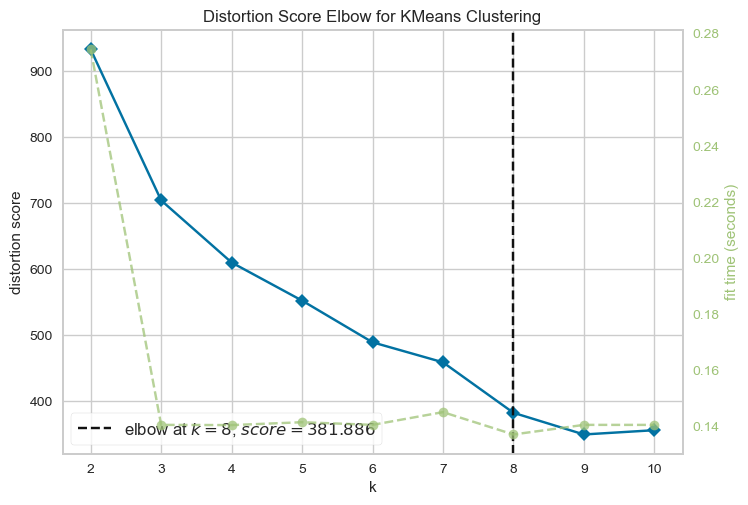

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
kelbow.fit(pca_data)
kelbow.show()

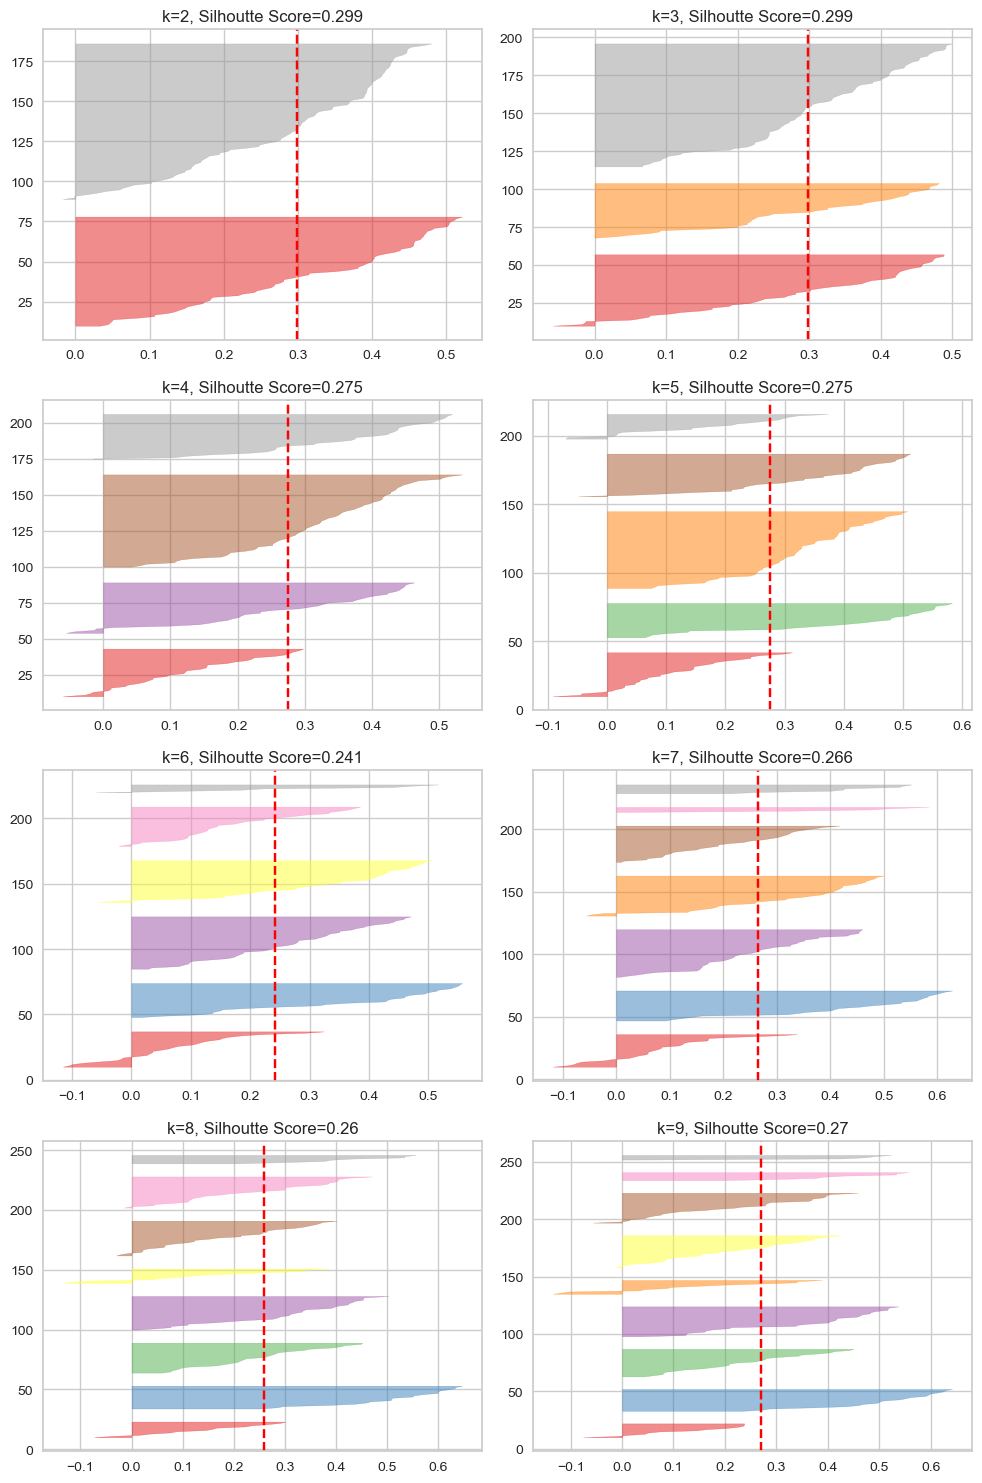

In [42]:
## Silhouette Visualizer
t=1
plt.figure(figsize=(10,15))
for i in range(2,10):
    plt.subplot(4,2,t)
    model=KMeans(n_clusters=i,random_state=2)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(pca_data)
    plt.title(f'k={i}, Silhoutte Score={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

k=2 and k=3 are giving better clusters. But silhotte score is slightly better in k=3 also the cluster that are formed have fairly good distribution.
Lets go with k=3.

In [44]:
kmeans=KMeans(n_clusters=3,random_state=2)

In [45]:
labels=kmeans.fit_predict(pca_data)

In [46]:
centroids=kmeans.cluster_centers_
centroids

array([[-2.5308199 ,  0.10840405, -0.20904521,  0.63748954, -0.14282851],
       [ 2.86681026, -0.35670063, -0.14254351,  0.83051233, -0.23432848],
       [ 0.18789482,  0.09749425,  0.18668634, -0.74790798,  0.18934052]])

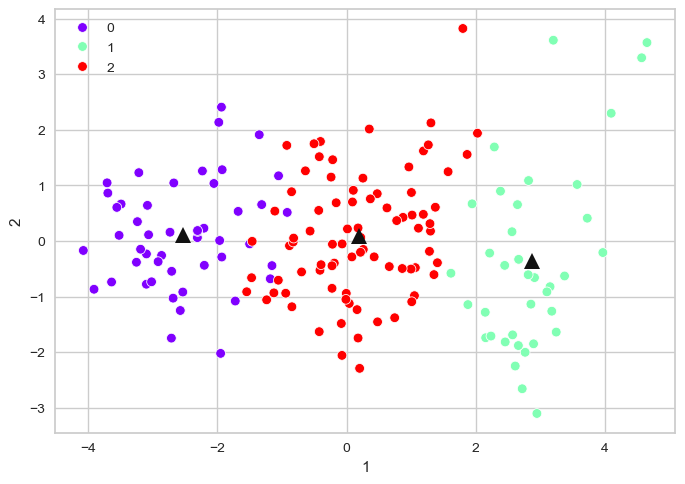

In [47]:
sns.scatterplot(data=pca_data,x=1,y=2,hue=labels,palette='rainbow')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],color='k',marker='^',ms=12)

plt.show()

In [48]:
labels

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [49]:
data['Label']=labels

In [50]:
data

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   
...                         ...      ...     ...      ...      ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7   2950.0       2.62   
Venezuela                  17.1     28.5    4.91     17.6  16500.0      28.63   
Vietnam                    23.3     72.0    6.84     80.2   4490.0      12.10   
Yemen                      56.3     30.0    5.18     34.4   4480.0      23.60   
Zambia                     83.1     37.0    5.89     30.9   3280.0      14.00   

                     life_expec  total_fer     gdpp  Label  
country                                                     
Afghanistan                56.2       5.82    553.0      0  
Albania                    76.3       1.65   4090.0      2  
Algeria                    76.5       2.89   4460.0      2  
Angola                     60.1       6.16   3530.0      0  
Antigua and Barbuda        76.8       2.13  12200.0      2  
...                         ...        ...      ...    ...  
Vanuatu                    63.0       3.50   2970.0      2  
Venezuela                  75.4       2.47  13500.0      2  
Vietnam                    73.1       1.95   1310.0      2  
Yemen                      67.5       4.67   1310.0      0  
Zambia                     52.0       5.40   1460.0      0  

[167 rows x 10 columns]

In [51]:
data.groupby('Label').mean().T

Label                 0             1             2
child_mort    91.570833      5.237838     21.508537
exports       28.546229     52.458108     40.797317
health         6.296458      8.730541      6.231951
imports       41.443040     47.971622     48.097561
income      3937.770833  41360.540541  12281.097561
inflation     10.345729      2.588432      7.365720
life_expec    59.558333     79.956757     72.875610
total_fer      4.953958      1.755676      2.311707
gdpp        1902.916667  34073.243243   6291.146341

In [52]:
data['Label']=data['Label'].map({1:'Developed',2:'Developing',0:'Underdeveloped'})

In [53]:
data.head(2)

child_mort  exports  health  imports  income  inflation  \
country                                                                
Afghanistan        90.2     10.0    7.58     44.9  1610.0       9.44   
Albania            16.6     28.0    6.55     48.6  9930.0       4.49   

             life_expec  total_fer    gdpp           Label  
country                                                     
Afghanistan        56.2       5.82   553.0  Underdeveloped  
Albania            76.3       1.65  4090.0      Developing

In [54]:
### Developed Countries
data[data['Label']=='Developing'].index.tolist()

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Thailand',
 'Tonga',
 'Tun

In [55]:
data[data['Label']=='Underdeveloped'].index.tolist()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [56]:
data[data['Label']=='Developed'].index.tolist()

['Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

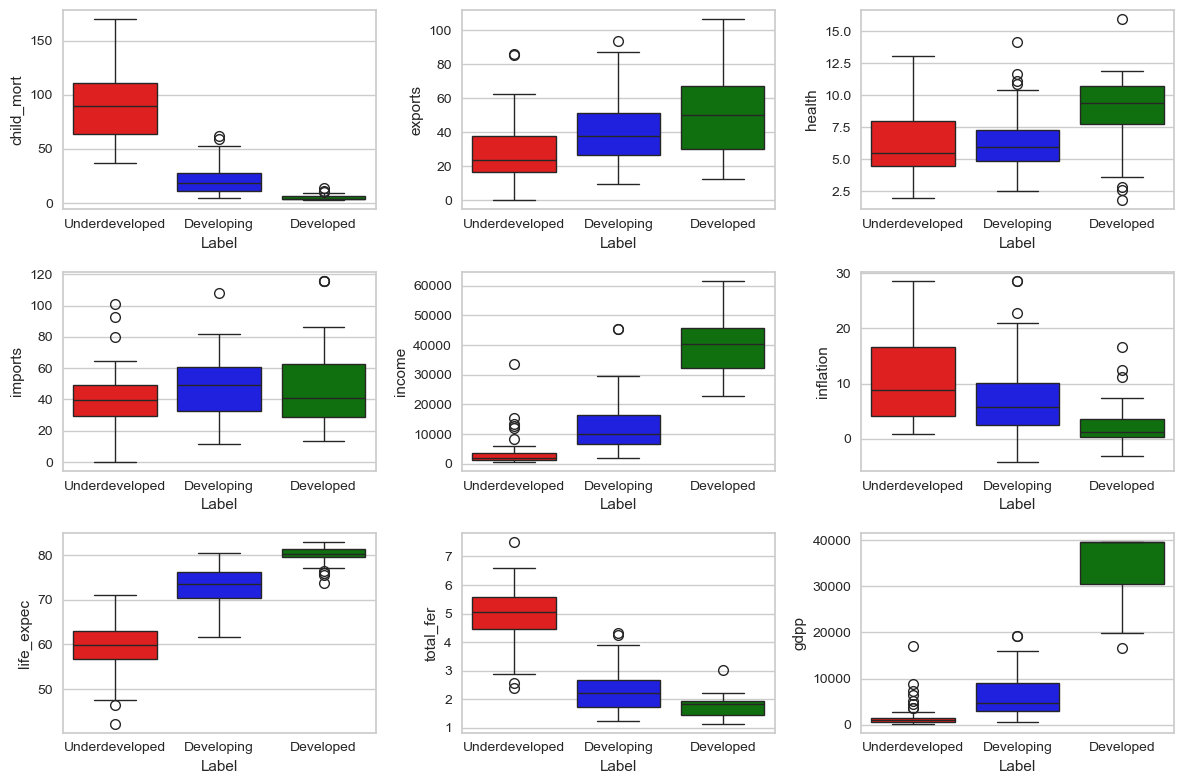

In [106]:
# Let's visualize the clusters
t=1
plt.figure(figsize=(12,8))
for i in data:
    if i !='Label':
        plt.subplot(3,3,t)
        sns.boxplot(data=data, y=i, x='Label', palette=['red','blue','green'])
        t+=1
plt.tight_layout()
plt.show()

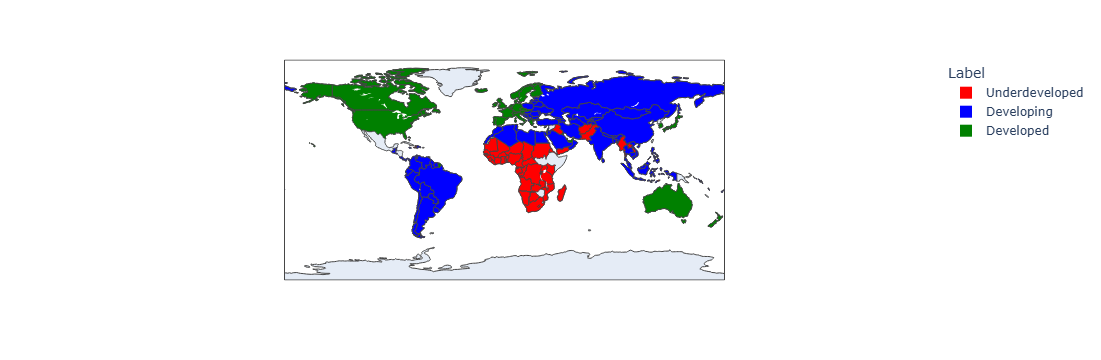

In [113]:
## World MAP
px.choropleth(data,locationmode='country names',locations=data.index,color='Label',
              color_discrete_map={'Underdeveloped':'red','Developing':'blue','Developed':'green'})

### Deployment

In [ ]:
## In order to make prediction 

In [116]:
pca_data.head(2)

1         2         3         4         5
0 -3.099217 -0.232689 -0.972447  0.787536 -0.009905
1  0.427427 -0.285346 -0.242571 -1.377388  0.114011

In [118]:
kmeans.predict([[-3.099217,-0.232689,-0.972447,0.787536,-0.009905]])

array([0])

In [122]:
### Lets download the instances that we require to deploy
import pickle 
with open('scaler.pkl','wb')as file:
    pickle.dump(sl,file)

with open('pca.pkl','wb')as file:
    pickle.dump(pca_final,file)

with open('model.pkl','wb')as file:
    pickle.dump(kmeans,file)